In [17]:
import matplotlib.pyplot as plt
import math
from anastruct import SystemElements

In [18]:
ss = SystemElements()

In [19]:
nodes = {
    'A': (0,0),
    'B': (1,1),
    'C': (2,0),
    'D': (1, 0.25)
}

cncts = [('A', 'B'), ('A', 'D'),
        ('B', 'C'), ('C', 'D'),
        ('D', 'B')]

In [20]:
for connection in cncts:
    element_truss = [list(nodes.get(connection[0])), list(nodes.get(connection[1]))]
    ss.add_truss_element(location = element_truss)

In [21]:
reation_A = ss.find_node_id(list(nodes.get('A')))
reation_C = ss.find_node_id(list(nodes.get('C')))

ss.add_support_hinged(node_id=reation_A)
ss.add_support_roll(node_id=reation_C, direction=2)

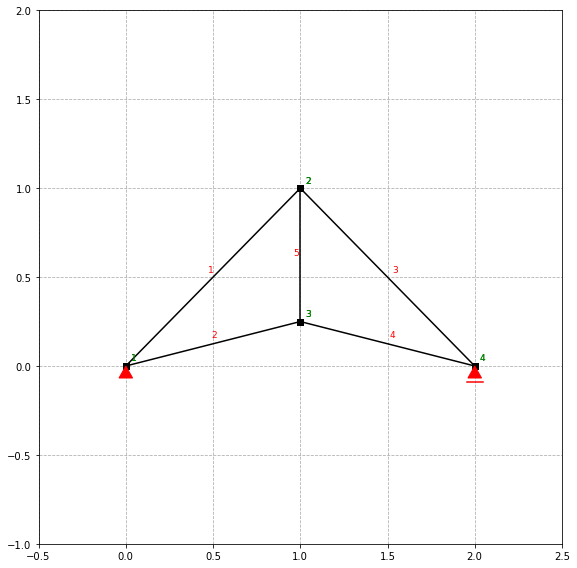

In [22]:
fig = ss.show_structure(scale = 0.75,figsize=(8,8), show=False)
plt.grid(linestyle='--')
plt.show()

In [23]:
extern_force =- 1

In [24]:
for node in ['D']:
    extern_force_loc = ss.find_node_id(list(nodes.get(f'{node}')))
    ss.point_load(node_id=extern_force_loc, Fy=extern_force)

In [25]:
ss.solve()

array([ 0.        ,  0.        ,  0.00052036,  0.00012903,  0.00025473,
       -0.00328701,  0.00012903,  0.0003214 , -0.00082158,  0.00025805,
        0.        ,  0.00069554])

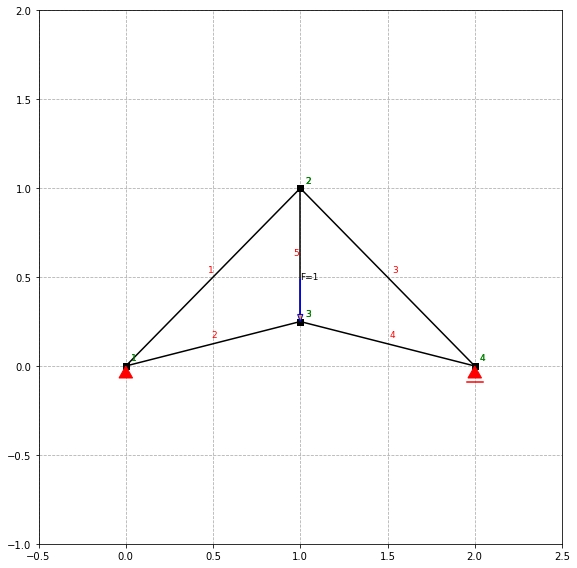

In [26]:
fig = ss.show_structure(scale = 0.75, figsize=(8,8), show=False)
plt.grid(linestyle='--')
path = 'results/exercise13_Struct.png'
plt.savefig(path)
plt.show()
plt.close()

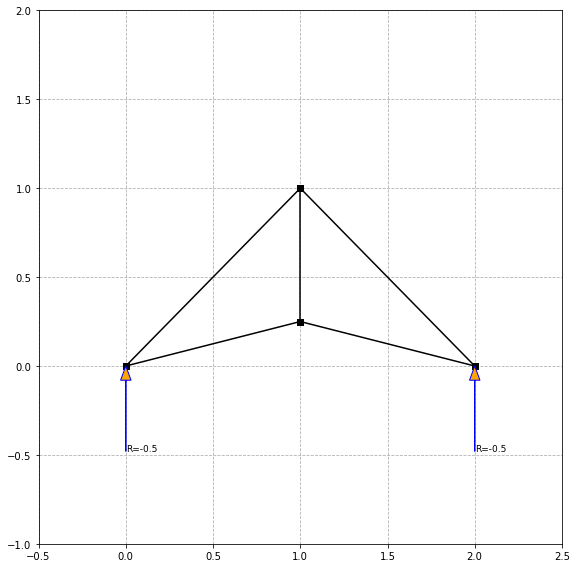

In [27]:
fig = ss.show_reaction_force(scale = 0.75, figsize=(8,8), show=False)
plt.grid(linestyle='--')
path = 'results/exercise_13_ExternForce.png'
plt.savefig(path)
plt.show()

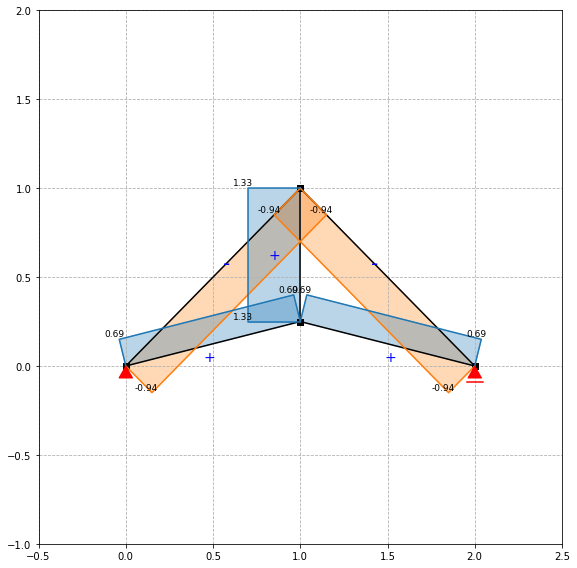

In [28]:
fig = ss.show_axial_force(scale = 0.75, figsize=(8,8), show=False, values_only=False)
plt.grid(linestyle='--')
path = 'results/exercise_13_InternReactions.png'
plt.savefig(path)
plt.show()
plt.close()

In [29]:
elements = ss.get_element_results()
for element in elements:
    display(element)

{'id': 1,
 'length': 1.4142135381698608,
 'alpha': -5.497787143782138,
 'u': -1.7777777473524049e-06,
 'N': -0.9428090415820622}

{'id': 2,
 'length': 1.0307763814926147,
 'alpha': -6.038206644052722,
 'u': 9.44444421619113e-07,
 'N': 0.6871842709362755}

{'id': 3,
 'length': 1.4142135381698608,
 'alpha': -0.7853981633974484,
 'u': -1.7777777473524064e-06,
 'N': -0.942809041582063}

{'id': 4,
 'length': 1.0307763814926147,
 'alpha': -0.24497866312686423,
 'u': 9.444444216191136e-07,
 'N': 0.6871842709362761}

{'id': 5,
 'length': 0.75,
 'alpha': -4.71238898038469,
 'u': 1.3333333333333334e-06,
 'N': 1.3333333333333335}